<a href="https://colab.research.google.com/github/MariuszGrecki/Machine_learning_tutorial/blob/main/regression/05_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresja wielomianowa**
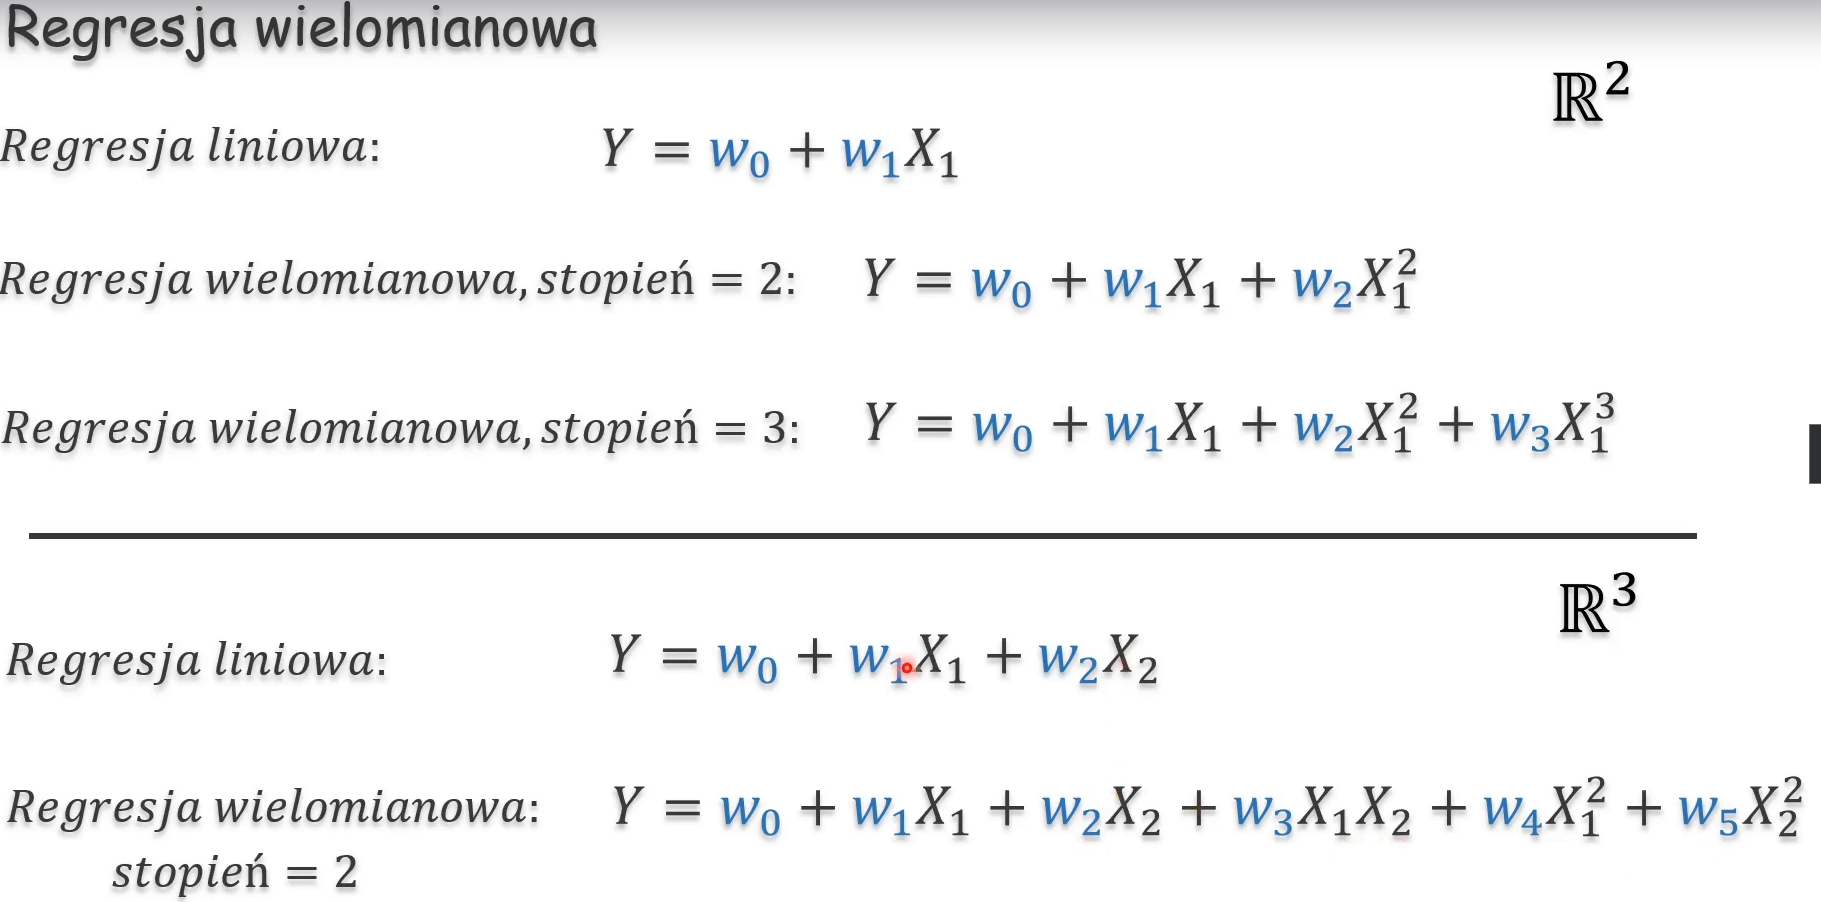

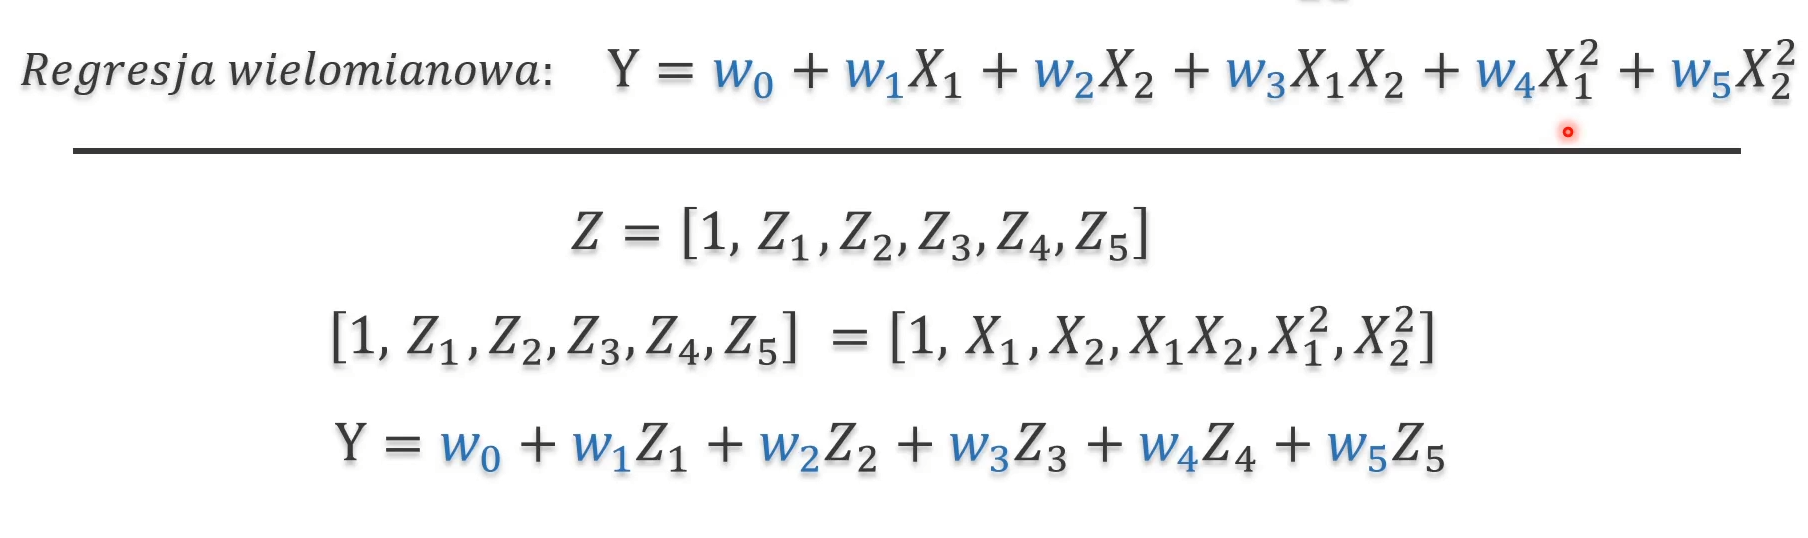

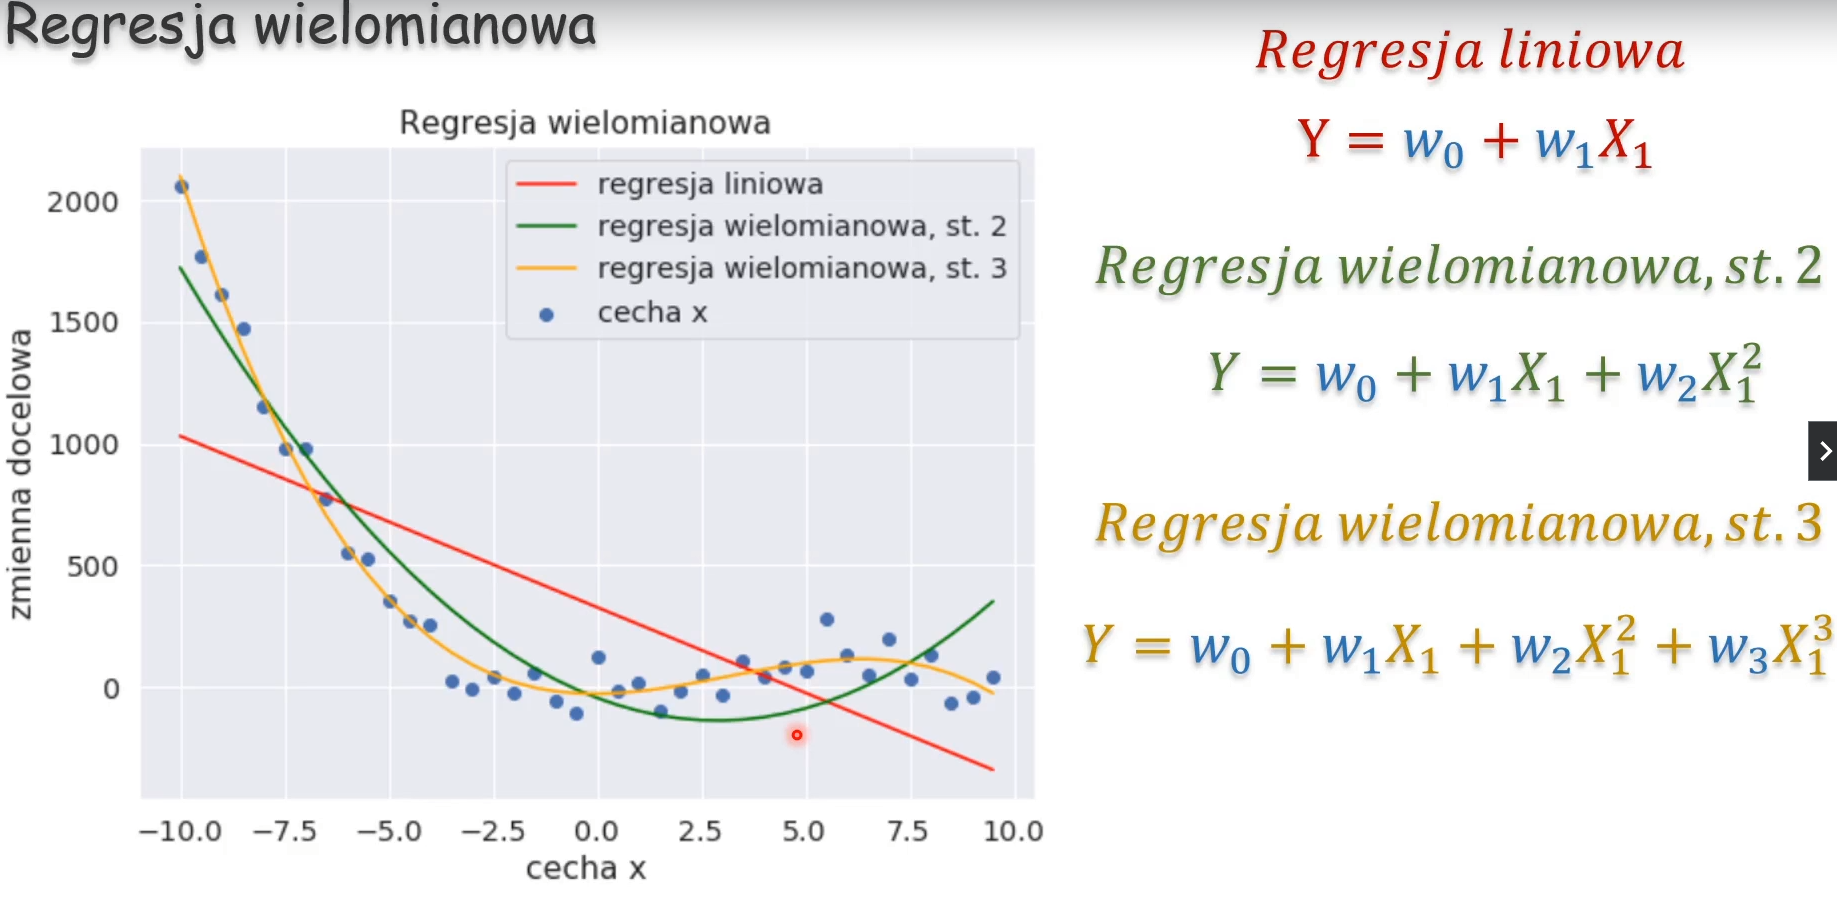

In [14]:
#import bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sns.set(font_scale=1.3)
sklearn.__version__

'1.2.2'

# Polynomial Regression - Regresja Wielomianowa

Powszechnym wzorcem stosowanym w uczeniu maszynowym jest użycie modeli liniowych wytrenowanych na nieliniowych funkcjach danych. Podejście to utrzymuje szybkie działanie modeli liniowych i zarazem umozliwia stosowanie metod liniowych dla znacznie szerszego zakresu danych.

Przykładowo, prosta regresja liniowa może zostać zastosowana przez skonstruowanie cech wielomianowych do modelów nieliniowych.

To implikuje fakt, iż nasz model regresji wielomianowej znajduje się w klasie modeli liniowych i może być rozwiązan za pomocą tych samych technik.

Rozważmy model regresji liniowej

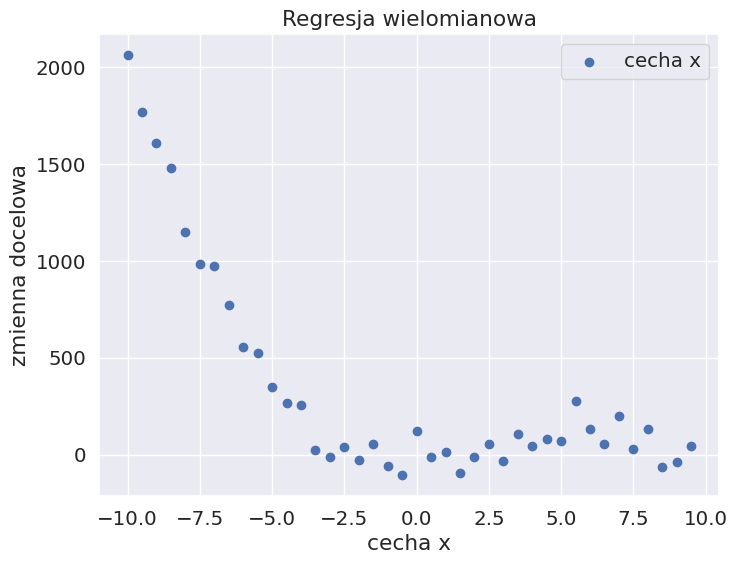

In [15]:
# Wygenerowanie danych
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X + 3 + noise
X = X.reshape(40,1)

plt.figure(figsize=(8,6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X,y,label='cecha x')
plt.legend()
plt.show()

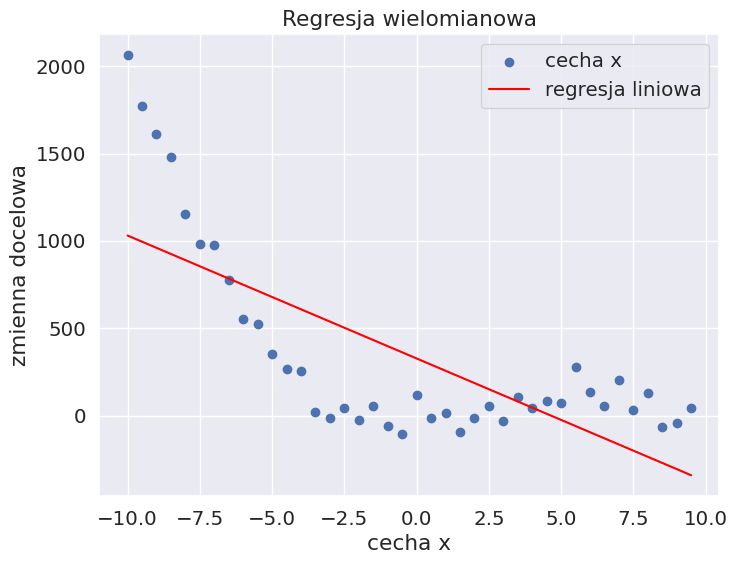

In [16]:
# model liniowy dla celów pokazowych brak podziału na zbiór treningowy i testowy
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X,y)
y_pred_lin = regressor.predict(X)

plt.figure(figsize=(8,6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import r2_score
r2_score(y, y_pred_lin)

0.5342822962632471

MOdel jest niedouczony (underfitting). Potrzebujemy zwiększyc złozonośc modelu

In [18]:
#Ekstrakcja cech wielomianowych - stopień 2

df = pd.DataFrame(data={'X': X.ravel()})
df.head(10)

,X
0,-10.0
1,-9.5
2,-9.0
3,-8.5
4,-8.0
5,-7.5
6,-7.0
7,-6.5
8,-6.0
9,-5.5


In [19]:
from sklearn.preprocessing import PolynomialFeatures

#regresja wielomianowa stopnia 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly
#pierwsza kolumna jedynki, druga X, trzecia X do kwadratu

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [20]:
X_poly.shape

(40, 3)

In [21]:
df = pd.DataFrame(X_poly)
df.columns = ['1', 'x', 'x^2']
df.head(10)

,1,x,x^2
0,1.0,-10.0,100.00
1,1.0,-9.5,90.25
2,1.0,-9.0,81.00
3,1.0,-8.5,72.25
4,1.0,-8.0,64.00
5,1.0,-7.5,56.25
6,1.0,-7.0,49.00
7,1.0,-6.5,42.25
8,1.0,-6.0,36.00
9,1.0,-5.5,30.25


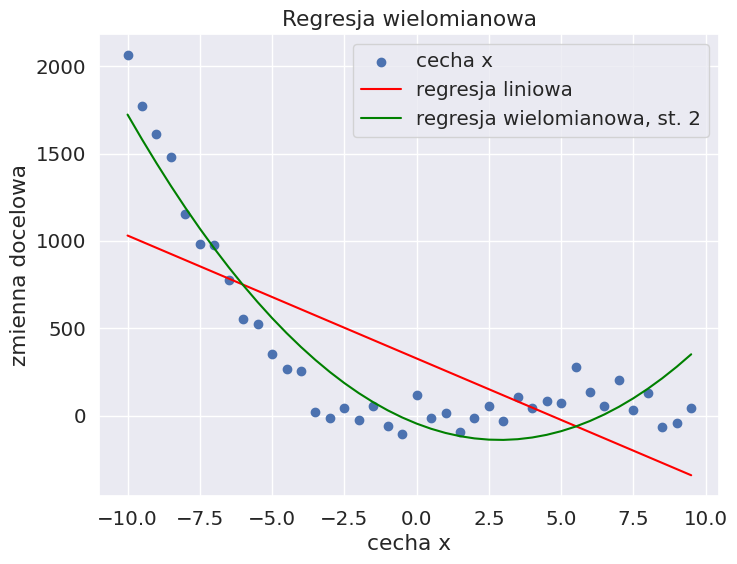

In [22]:
#Dopasowaniu modelu

regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

y_pred_2 = regressor_poly.predict(X_poly)

plt.figure(figsize=(8,6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(X, y_pred_2, c='green', label='regresja wielomianowa, st. 2')
plt.legend()
plt.show()

In [23]:
#tutaj wynik jest już sporo wyższy
r2_score(y, y_pred_2)

0.8951163003458433

In [24]:
#Ekstrakcja cech wielomianowych - stopień 3
poly = PolynomialFeatures(degree=3)

X_poly_3 = poly.fit_transform(X)
X_poly_3
# jedynka, x, x do kwadratu, x do stopnia 3

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

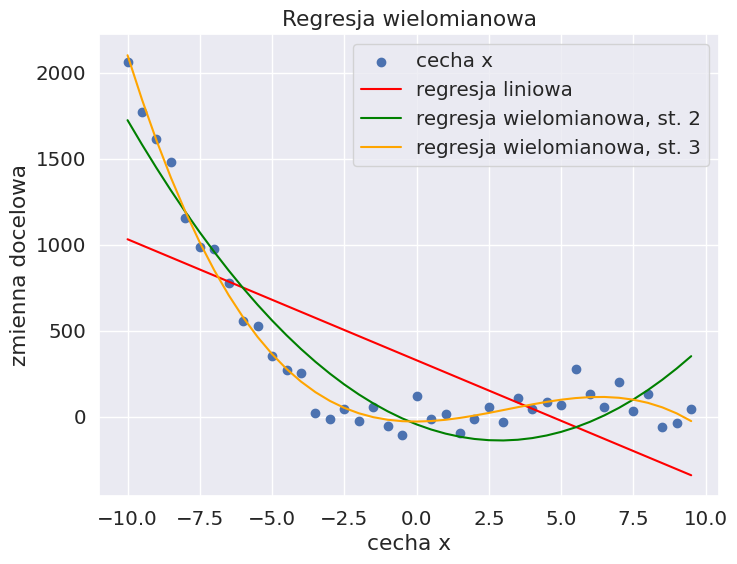

In [25]:
#dopasowanie modelu
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly_3, y)

y_pred_3 = regressor_poly_3.predict(X_poly_3)

plt.figure(figsize=(8,6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(X, y_pred_2, c='green', label='regresja wielomianowa, st. 2')
plt.plot(X, y_pred_3, c='orange', label='regresja wielomianowa, st. 3')
plt.legend()
plt.show()

In [27]:
r2_score(y, y_pred_3)


0.9841708613657418

In [28]:
r2_score(y, y_pred_lin)

0.5342822962632471

In [29]:
#porównanie metryk
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [32]:
results = pd.DataFrame(data={
  'name' : ['regresja liniowa', 'regresja wielomianowa st.2', 'regresja wielomianowa st.3'],
  'r2_score' : [r2_score(y, y_pred_lin), r2_score(y, y_pred_2), r2_score(y, y_pred_3)],
  'mae': [mae(y, y_pred_lin), mae(y, y_pred_2), mae(y, y_pred_3)],
  'mse': [mse(y, y_pred_lin), mse(y, y_pred_2), mse(y, y_pred_3)],
  'rmse': [np.sqrt(mse(y, y_pred_lin)), np.sqrt(mse(y, y_pred_2)), np.sqrt(mse(y, y_pred_3))]
  })
results

,name,r2_score,mae,mse,rmse
0,regresja liniowa,0.534282,316.267126,143775.153332,379.176942
1,regresja wielomianowa st.2,0.895116,155.977929,32379.421866,179.942829
2,regresja wielomianowa st.3,0.984171,57.572030,4886.730343,69.905152


In [33]:
#wykres z metryką r2_score
px.bar(results, x='name', y='r2_score', width=700, title='Regresja wielomianowa - R2_score')

In [34]:
#im mniejsza wartośc tym mdoel lepszy
px.bar(results, x='name', y='mae', width=700, title='Regresja wielomianowa - mean absolute error')

In [35]:
px.bar(results, x='name', y='mse', width=700, title='Regresja wielomianowa - mean squared error')
#im mniejsza wartośc tym mdoel lepszy

In [36]:
px.bar(results, x='name', y='rmse', width=700, title='Regresja wielomianowa - root mean squared error')
#im mniejsza wartośc tym mdoel lepszy